In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.sparse import find
import imutils
import cv2
import time

In [239]:
start = time.time()
i = 0

block_locations = []
block_areas = []
overall_block_locations = []
overall_block_areas = []

cap = cv2.VideoCapture(2)

X = 640; Y = 480 #Dimensions of camera feed
x, y = np.meshgrid(np.arange(0,X),np.arange(0,Y))
condition = (x < 10) | (x > X-20) | ((x > 586) & (y > 160) & (y < 274)) | ((x > 313) & (x < 322)) #| (y < 10) | (y > Y-10)

while(i < 100):
    # Take each frame
    _, frame = cap.read()
    #frame = cv2.imread("demo_robot_identifier.PNG")
    
    
    untouched = frame.copy()
    frame[condition] = 0
    
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    h = 107
    s = 0.27
    v = 0.71
    #green line h = 165°  s = 0.79 v = 0.64
    #blue blocks h = 210°, s = 0.52, v = 0.87
    #red line h = 1° s = 0.44  v = 0.93
    #purple circle h = 348°  s = 28 v = 95
    #dark orange 31 60 73
    #dark purple 344 45 46
    #small dark green 178 21 60
    #big dark green 107 27 71
    
    # define range of green color in HSV
    lower_green = np.array([(h-10)*0.5,255*max(s-0.10,0),255*max(v-0.10,0)])
    upper_green = np.array([(h+10)*0.5,255*min(s+0.10,1),255*min(v+0.10,1)])

    #Set edge of image to zero, for side effects of arena
    hsv[condition] = 0
    
    # Threshold the HSV image to get only blue colours
    image = cv2.inRange(hsv, lower_green, upper_green)

    #image = mask.copy()  or cv2.imread("mask.png")
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    #thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
    some_image, cnts, hierarchy = cv2.findContours(blurred.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  #might have to do blurrey.copy()
    #need comma after hierarchy?
    
    
    if cnts:     #check for contours to make sure image isn't disconnected 
        overall_block_locations.append(block_locations)
        overall_block_areas.append(block_areas)
        block_areas = []
        block_locations = []
    
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 100:
        
            # compute the center of the contour
            M = cv2.moments(c)

            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            #Update block locations list
            block_locations.append((cX,cY))
            block_areas.append(cv2.contourArea(c))

            # draw the contour and center of the shape on the image
            cv2.drawContours(frame, [c], -1, (0, 255, 0), 1)
            cv2.circle(frame, (cX, cY), 3, (255, 0, 255), -1)

            # show the image
            cv2.imshow("Image with locations", frame)
            cv2.waitKey(5)
    
    # Bitwise-AND mask and original image
    #res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('untouched',untouched)
    cv2.imshow('blurred',blurred)
    cond_image = frame.copy()
    cond_image[condition] = 0
    cv2.imshow('cond_image', cond_image)
    #cv2.imshow('res',res)
    cv2.waitKey(5)

    #k = cv2.waitKey(1) & 0xFF
    #if k == 5:
    #    break
    i += 1

end = time.time()
print(end - start)    

cv2.destroyAllWindows()

7.917660713195801


In [240]:
cap.release()
cv2.destroyAllWindows()
print(overall_block_locations)
print(overall_block_areas)
#area orange 200-230
#area purple 300 - 540
#area small dark green 140
#area large dark green 430

[[], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(433, 128)], [(433, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(431, 128)], [(432, 128)], [(431, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(433, 128)], [(433, 128)], [(433, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(433, 128)], [(433, 128)], [(432, 128)], [(432, 128)], [(432, 127)], [(431, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(433, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(433, 128)], [(432, 128)], [(432, 128)], [(432, 128)], [(433, 128)], [(432, 128)], [(433, 127)], [(432, 128)], [(432, 127)], [(432, 128)], [(432, 128)], [

In [59]:
frame = cv2.imread("sample_arena_table_2.PNG")
    
# Convert BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

cv2.imshow("frame", frame)
cv2.imshow("Image hsv", hsv)
cv2.waitKey(5)

-1

In [183]:
cnts

[array([[[524, 469]],
 
        [[524, 473]],
 
        [[528, 473]],
 
        [[528, 469]]], dtype=int32), array([[[172, 416]],
 
        [[172, 420]],
 
        [[176, 420]],
 
        [[176, 416]]], dtype=int32), array([[[169, 406]],
 
        [[169, 410]],
 
        [[173, 410]],
 
        [[173, 406]]], dtype=int32), array([[[206, 369]],
 
        [[206, 373]],
 
        [[210, 373]],
 
        [[210, 369]]], dtype=int32), array([[[311, 306]],
 
        [[311, 310]],
 
        [[315, 310]],
 
        [[315, 306]]], dtype=int32), array([[[ 98, 107]],
 
        [[ 98, 109]],
 
        [[ 97, 110]],
 
        [[ 96, 110]],
 
        [[ 96, 113]],
 
        [[ 95, 114]],
 
        [[ 92, 114]],
 
        [[ 92, 118]],
 
        [[ 93, 118]],
 
        [[ 94, 119]],
 
        [[ 93, 120]],
 
        [[ 92, 120]],
 
        [[ 92, 124]],
 
        [[ 93, 125]],
 
        [[ 95, 125]],
 
        [[ 96, 126]],
 
        [[ 97, 126]],
 
        [[ 98, 127]],
 
        [[ 98, 129]],
 
    

In [41]:
cv2.imwrite("mask.png", mask[condition])

True

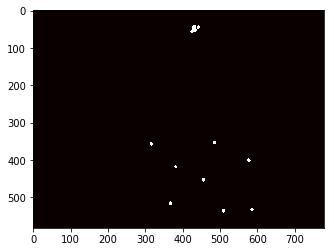

In [68]:
image = cv2.imread("mask.png")   #mask.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap='hot')
plt.show()
some_image, cnts, hierarchy,  = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [54]:
block_locations = []

# loop over the contours
for c in cnts:

    # compute the center of the contour
    M = cv2.moments(c)

    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    #Update block locations list
    block_locations.append((cX,cY))
    
    # draw the contour and center of the shape on the image
    cv2.drawContours(image, [c], -1, (0, 255, 0), 1)
    cv2.circle(image, (cX, cY), 3, (255, 0, 255), -1)

    # show the image
    cv2.imshow("Image", image)
    cv2.waitKey(5)

In [8]:
cv2.destroyAllWindows()
print(block_locations)

[(256, 184), (535, 182)]


In [12]:
# Colour required to identify features in format (H in degrees, S decimal, V decimal)
blue = (210, 0.52, 0.87)
red = (1, 0.44, 0.93)
green = (165, 0.79, 0.64)
purple = (0, 0, 0)  # Change! RGB 234, 12, 208
orange = (0, 0, 0)  # RGB 226, 183, 0

# Create dictionary of "colour": (lower_colour, upper_colour) where each are tuple len=3
colour_dict = {"purple": (((purple[0] - 10) * 0.5, 255 * max(purple[1] - 0.2, 0), 255 * max(purple[2] - 0.2, 0)), ((purple[0] + 10) * 0.5, 255 * min(purple[1] + 0.2, 1), 255 * min(purple[2] + 0.2, 1))), "blue": (((blue[0] - 10) * 0.5, 255 * max(blue[1] - 0.2, 0), 255 * max(blue[2] - 0.2, 0)), ((blue[0] + 10) * 0.5, 255 * min(blue[1] + 0.2, 1), 255 * min(blue[2] + 0.2, 1))), "green": (((green[0] - 10) * 0.5, 255 * max(green[1] - 0.2, 0), 255 * max(green[2] - 0.2, 0)), ((green[0] + 10) * 0.5, 255 * min(green[1] + 0.2, 1), 255 * min(green[2] + 0.2, 1))), "red": (((red[0] - 10) * 0.5, 255 * max(red[1] - 0.2, 0), 255 * max(red[2] - 0.2, 0)), ((red[0] + 10) * 0.5, 255 * min(red[1] + 0.2, 1), 255 * min(red[2] + 0.2, 1)))}


In [16]:
colour_dict["blue"]

((100.0, 81.60000000000001, 170.85), (110.0, 183.6, 255))

In [21]:
np.array(colour_dict["blue"][0])

array([100.  ,  81.6 , 170.85])

In [22]:
lower_green

array([100.  ,  81.6 , 170.85])

In [23]:
colour_dict = {"purple": (((purple[0] - 10) * 0.5, 255 * max(purple[1] - 0.2, 0), 255 * max(purple[2] - 0.2, 0)), ((purple[0] + 10) * 0.5, 255 * min(purple[1] + 0.2, 1), 255 * min(purple[2] + 0.2, 1))), "blue": (((blue[0] - 10) * 0.5, 255 * max(blue[1] - 0.2, 0), 255 * max(blue[2] - 0.2, 0)), ((blue[0] + 10) * 0.5, 255 * min(blue[1] + 0.2, 1), 255 * min(blue[2] + 0.2, 1))), "green": (((green[0] - 10) * 0.5, 255 * max(green[1] - 0.2, 0), 255 * max(green[2] - 0.2, 0)), ((green[0] + 10) * 0.5, 255 * min(green[1] + 0.2, 1), 255 * min(green[2] + 0.2, 1))), "red": (((red[0] - 10) * 0.5, 255 * max(red[1] - 0.2, 0), 255 * max(red[2] - 0.2, 0)), ((red[0] + 10) * 0.5, 255 * min(red[1] + 0.2, 1), 255 * min(red[2] + 0.2, 1)))}


In [25]:
colour_dict["purple"]

((-5.0, 0, 0), (5.0, 51.0, 51.0))

In [184]:
good_c = list(filter(lambda x : cv2.contourArea(x) > 300, cnts))

In [186]:
M = cv2.moments(good_c[0])

cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
print(cX,cY)

103 118
